
# Accelerating equilibrium spin-glass simulations using quantum annealers via generative deep learning


If you want to run this notebook and reproduce all the results from the paper, please dowload first all the required data. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from src.utils.plt_utils import plt_hist, plt_engbeta, plt_engstep, plt_ar, plt_acf, plt_chains

plt.style.use('data/data_for_fig/paper.mplstyle')


In [2]:
ground_state100 = -1.2210
ground_state484_4 = -0.7550
ground_state484_8 = -1.0982


## Figure 1

Histograms of $10^5$ configuration energies per spin $H/N$, for a $N=100$ square lattice with nearest-neighbor couplings. The samples of a D-Wave QA with annealing time $t_a=100\upmu$s  (grey) are compared with those of three autoregressive neural networks, namely, NADE, MADE, and PixelCNN. These are trained on the $10^5$ D-Wave configurations. The vertical (red) line corresponds to the ground-state energy.

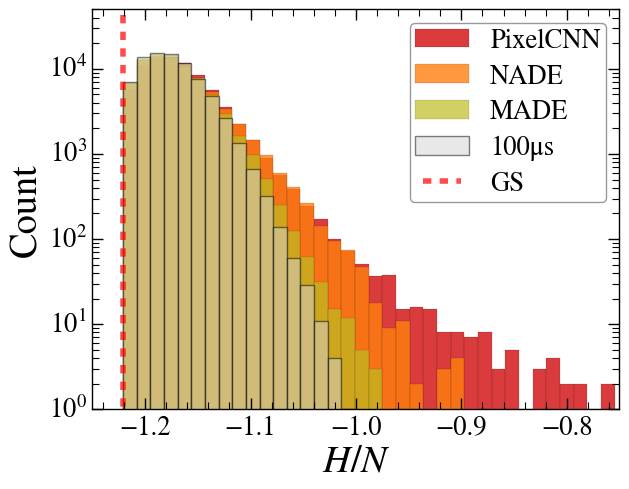

In [3]:
data_fig1 = np.loadtxt("data/data_for_fig/data_fig1.csv", delimiter=',')

labels_fig1 = [r"PixelCNN", r"NADE", r"MADE", u"100\u03bcs"]
colors_fig1 =["tab:red", "tab:orange", "tab:olive", "lightgrey"]
bins_fig1 = 50
xlim_fig1 = (-1.25, -0.75)
ylim_fig1 = (1, 50000)

fig, ax1 = plt.subplots(1,1)
plt_hist(ax1, data_fig1, labels_fig1, colors_fig1, bins_fig1, ground_state100, xlim=xlim_fig1, ylim=ylim_fig1)
#plt.savefig("fig1.pdf")


## Figure 2

Histograms of $10^5$ configuration energies per spin $H/N$, for the $N=100$ lattice with nearest neighbor couplings. The three datasets correspond to three annealing times $t_a$. The vertical (red) line indicates the ground-state energy.

In [11]:
data_fig2 = np.loadtxt("data/data_for_fig/data_fig2.csv", delimiter=',')

labels_fig2 = [u"1\u03bcs", u"10\u03bcs", u"100\u03bcs"]
colors_fig2 = ["blue", "green", "lightgrey"]
bins_fig2 = 50
xlim_fig2 = (-1.25,-0.9)
ylim_fig2 = (1,50000)

fig, ax2 = plt.subplots(1,1)
plt_hist(ax2, data_fig2, labels_fig2, colors_fig2, bins_fig2, ground_state100, xlim=xlim_fig2, ylim=ylim_fig2)
#plt.savefig("fig2.pdf")


## Figure 3

Panel (a): 
Average energy per spin $E/N$ as a function of the inverse temperature $\beta$, for the $N=100$ lattice.
The SSF-MC simulations (full red circles) are compared with three N-MC simulations driven by MADEs trained with different annealing times.
The horizontal (red) dashed line indicates the ground-state (GS) energy.
Panel (b): 
$E/N$ versus  $\beta$ for the SSF-MC simulations (full red circles), the N-MC simulations with annealing time $t_a=100 \upmu$s (green empty rhombi), and the N-MC simulations corresponding to  hybrid training data, including the QA configurations and SSF-MC simulations at $\beta=0.5$ (blue empty stars).
Panel (c): 
MH acceptance rates $A_r$ as a function of inverse temperature $\beta$. The SSF data (gray dashed curve) are compared to three N-MC datasets corresponding to different annealing times.

In [10]:
data_fig3a = np.loadtxt("data/data_for_fig/data_fig3a.csv", delimiter=',')
data_fig3b = np.loadtxt("data/data_for_fig/data_fig3b.csv", delimiter=',')
data_fig3c = np.loadtxt("data/data_for_fig/data_fig3c.csv", delimiter=',')

labels_fig3a = ["SSF-MC", u"N-MC 1\u03bcs", u"N-MC 10\u03bcs", u"N-MC 100\u03bcs"]
xlim_fig3a = (0.7,2.3)
colors_fig3a = ["tab:red", "tab:blue", "tab:orange", "tab:green"]
markers_fig3a = ["o", "s", "^", "d"]
markersizes_fig3a = [12, 16, 16, 16]
fillstyles_fig3a = ['full', 'none', 'none', 'none'] 
text_fig3a = (0.9,-1.175,"(a)")

labels_fig3b = ["SSF-MC", r"N-MC 100$\mathrm{\mu s},\beta=0.5$", u"N-MC 100\u03bcs"]
xlim_fig3b = xlim_fig3a
colors_fig3b = ["tab:red", "black", "tab:green"]
markers_fig3b = ["o", "*", "d"]
markersizes_fig3b = [14, 20, 16]
fillstyles_fig3b = ['full', 'none', 'none']
text_fig3b = (0.9,-1.175,"(b)")

labels_fig3c = [u"N-MC 1\u03bcs", u"N-MC 10\u03bcs", u"N-MC 100\u03bcs", "SSF-MC"]
colors_fig3c = ["tab:blue", "tab:orange", "tab:green", "dimgrey"]
linestyle_fig3c = ["--s", "--^", "--d", "--"]
text_fig3c = (0.9, 35, "(c)")

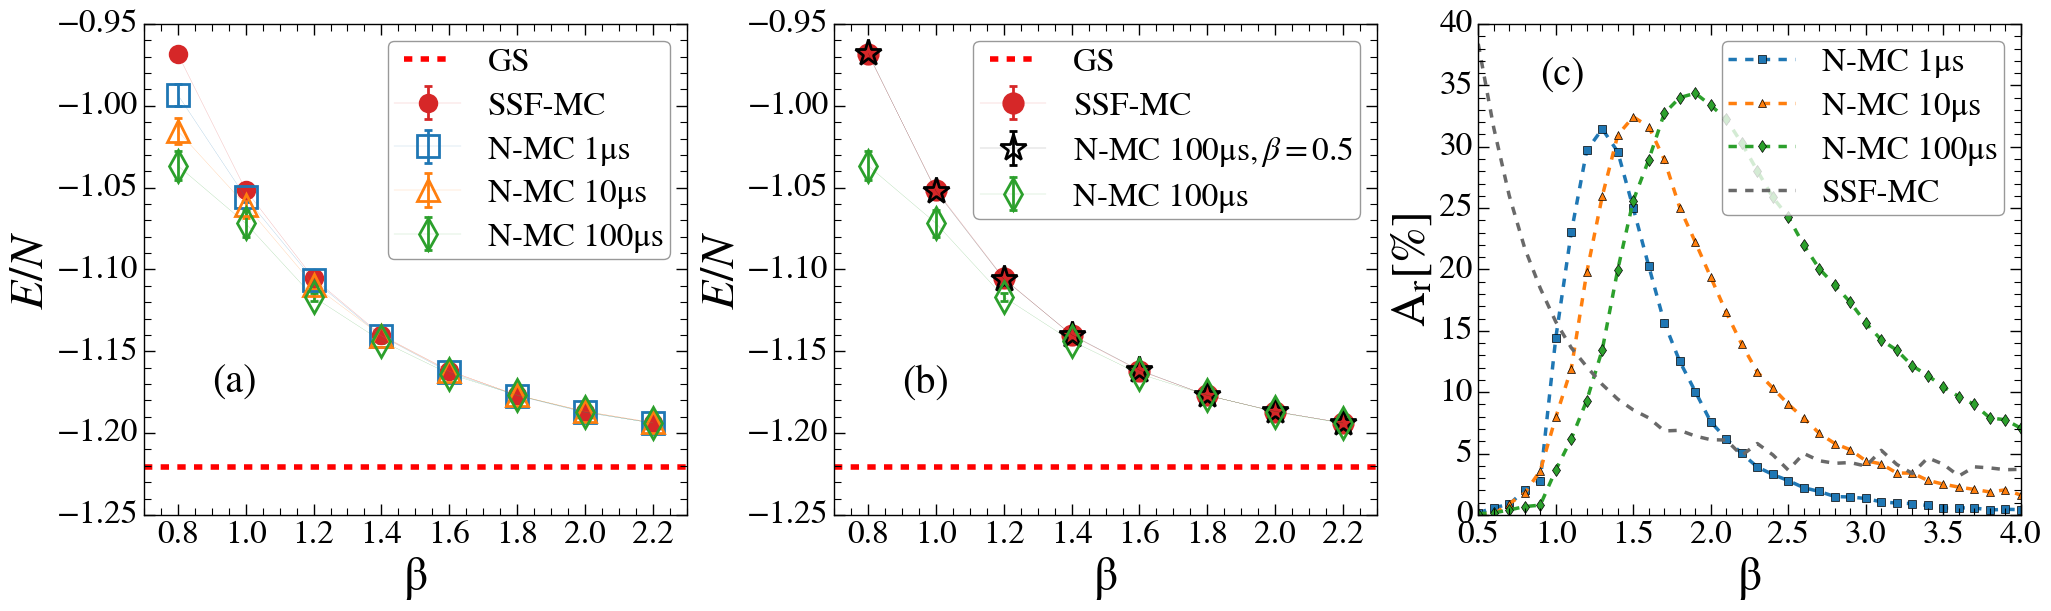

In [11]:
plt.rcParams.update({'font.size': 20})

ig, (ax3a, ax3b, ax3c) = plt.subplots(1, 3, figsize=(20.4, 6), constrained_layout=True)

plt_engbeta(ax3a, data_fig3a, labels_fig3a, colors_fig3a, markers_fig3a, markersizes_fig3a, fillstyles_fig3a, ground_state100, xlim=xlim_fig3a, text=text_fig3a)
plt_engbeta(ax3b, data_fig3b, labels_fig3b, colors_fig3b, markers_fig3b, markersizes_fig3b, fillstyles_fig3b, ground_state100, xlim=xlim_fig3b, text=text_fig3b)
plt_ar(ax3c, data_fig3c, linestyle_fig3c, labels_fig3c, colors_fig3c, text=text_fig3c)
#plt.savefig("fig3.pdf")


## Figure 4
 
Panel (a): 
Average energy per spin $E/N$ as a function of the inverse temperature $\beta$, for the $N=484\: (z=4)$ lattice.
The SSF-MC simulations (full red circles) are compared with an N-MC simulation (orange empty triangles) and with a H-MC simulations (blue empty circles).
The horizontal (red) dashed line indicates the ground-state (GS) energy.
Panel (b): 
Energy auto-correlation function $c(\tau)$ as a function of the number of sweeps $\tau$.
The SSF-MC results at three inverse temperatures (dashed curves) are compared with the corresponding H-MC results.
Panel (c): 
Configuration energy $H/N$ as a function of the number of sweeps $\tau$.
An SSF-MC simulation at $\beta=3$ (blue curve with shadow) is compared with the corresponding H-MC result (thick green curve). The semi-transparent shadow represents the fluctuations among 5 SSF-MC simulations. 

In [12]:
data_fig4a = np.loadtxt("data/data_for_fig/data_fig4a.csv", delimiter=',')
data_fig4b = np.loadtxt("data/data_for_fig/data_fig4b.csv", delimiter=',')
data_fig4c = np.load("data/data_for_fig/data_fig4c.npz")

labels_fig4a = ["SSF-MC", u"N-MC 100$\mathrm{\mu s}, \beta=0.5$", u"N-MC 100\u03bcs"]
colors_fig4a = ["tab:red", "tab:blue", "tab:orange"]
markers_fig4a = [".", "o", "^"]
markersizes_fig4a = [18, 16, 12]
fillstyles_fig4a = ['full', 'none', 'none',]
xlim_fig4a = (0.9, 3.9) 
ylim_fig4a = (-0.76, -0.5) 
text_fig4a = (1.5,-0.535,"(a)")

labels_fig4b = [r"SSF-MC $\beta=2.0$", r"SSF-MC $\beta=2.5$", r"SSF-MC $\beta=3.0$", r"H-MC $\beta=2.0$", r"H-MC $\beta=2.5$", r"H-MC $\beta=3.0$"]
colors_fig4b = ["gold", "red", "darkred", "skyblue", "steelblue", "blue"]
linestyle_fig4b = ["-", "-", "-", "--", "--", "--"]
ylim_fig4b = (0.08, 1)
xlim_fig4b = (1, 100000)
text_fig4b = (5,0.7,"(b)")

labels_fig4c = [rf"SSF-MC $\beta=3.0$", rf"H-MC $\beta=3.0$"]
colors_fig4c = ["tab:blue", "tab:green"]
xlim_fig4c = (1, 1000000)
text_fig4c = (10,-0.47,"(c)")

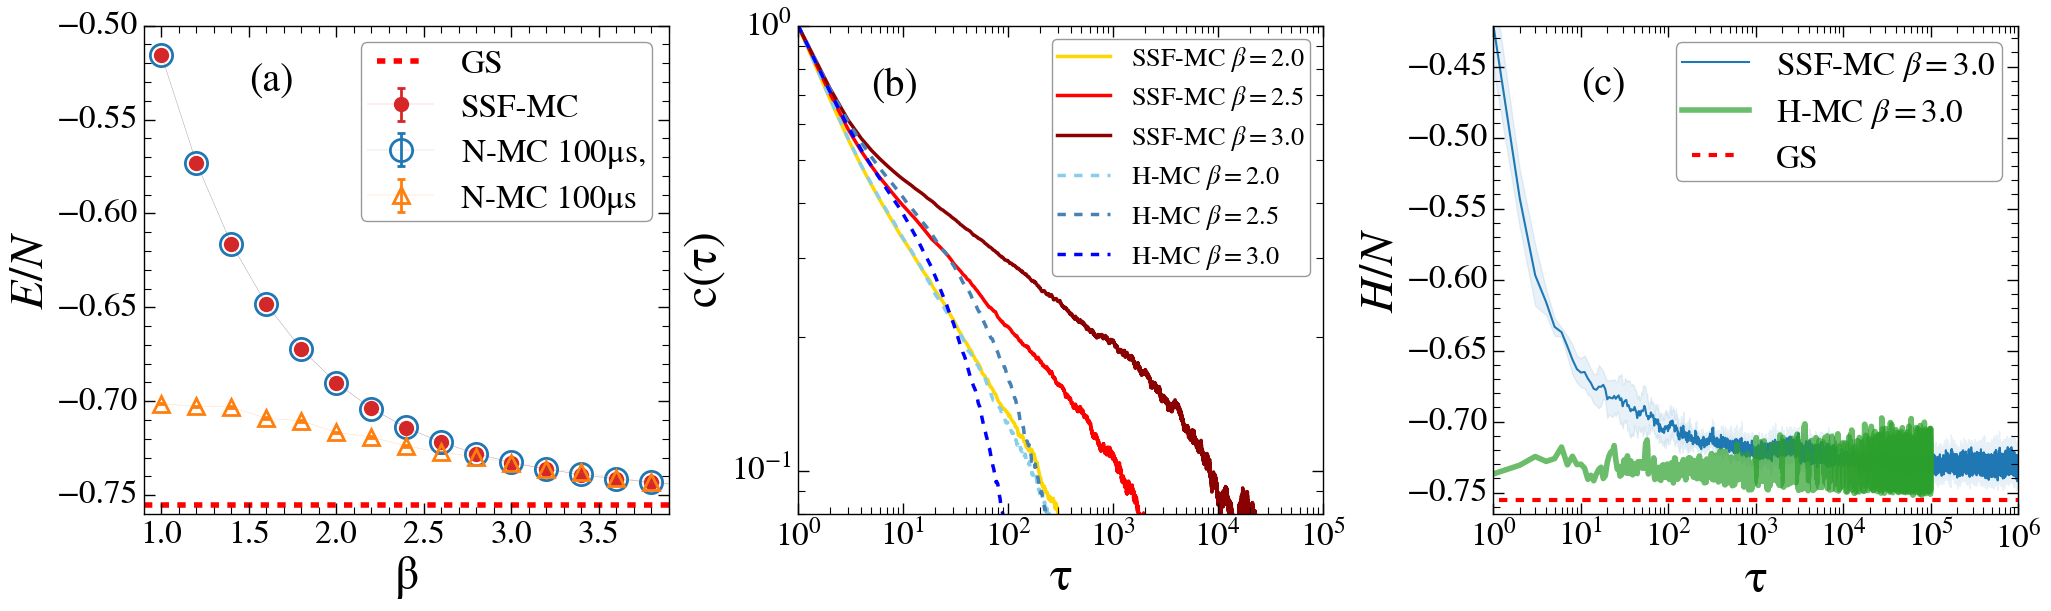

In [13]:
plt.rcParams.update({'font.size': 20})

fig, (ax4a, ax4b, ax4c) = plt.subplots(1, 3, figsize=(20.4,6), constrained_layout=True)

plt_engbeta(ax4a, data_fig4a, labels_fig4a, colors_fig4a, markers_fig4a, markersizes_fig4a, fillstyles_fig4a, ground_state484_4, xlim=xlim_fig4a, ylim=ylim_fig4a, text=text_fig4a)
plt_acf(ax4b, data_fig4b, linestyle_fig4b, labels_fig4b, colors_fig4b, xlim_fig4b, ylim_fig4b, text_fig4b)
plt_engstep(ax4c, data_fig4c, labels_fig4c, colors_fig4c, xlim_fig4c, ground_state484_4, text_fig4c)

#plt.savefig("fig4.pdf")


## Figure 5

Panel (a): 
Average energy per spin $E/N$ as a function of the inverse temperature $\beta$, for the $N=484\:(z=8)$ lattice.
The PT results (full yellow circles) are compared with H-MC simulations (empty blue circles) and with the average of 5 SSF-MC simulations run for $8 \times 10^7$ sweeps. The corresponding error-bars represent the estimated standard deviation of the mean of the 5 simulations.
The horizontal (red) dashed line indicates the ground-state (GS) energy.
Panel (b): 
Energy auto-correlation function $c(\tau)$ as a function of the number of sweeps $\tau$.
The PT results at three inverse temperatures (dashed curves) are compared with the H-MC results at similar temperatures.
Panel (c): 
Configuration energy $H/N$ as a function of the number of sweeps $\tau$.
A PT simulation at $\beta=4$ (blue curve) is compared with the corresponding H-MC result (thick green curve), and with the average of 5 SSF-MC simulations (red curve with shadow).

In [14]:
data_fig5a = np.loadtxt("data/data_for_fig/data_fig5a.csv", delimiter=',')
data_fig5a_pt, data_fig5a_hmc, data_fig5a_ssf = np.split(data_fig5a, [40,58])
data_fig5a = [data_fig5a_pt, data_fig5a_hmc, data_fig5a_ssf]
data_fig5b = np.loadtxt("data/data_for_fig/data_fig5b.csv", delimiter=',')
data_fig5c = np.load("data/data_for_fig/data_fig5c.npz")

labels_fig5a = ["PT", "H-MC", "SSF-MC"]
colors_fig5a = ["tab:olive", "tab:blue", "tab:red"]
markers_fig5a = ["o", "o", "."]
markersizes_fig5a = [12, 14, 14]
fillstyles_fig5a = ['full', 'none', 'full'] 
xlim_fig5a = (0.8, 10.5)
ylim_fig5a = (-1.105, -0.90)
text_fig5a = (2,-0.925,"(a)")

labels_fig5b = [r"PT $\beta=2.68$", r"PT $\beta=3.73$", r"PT $\beta=5.18$",
                r"H-MC $\beta=3.0$", r"H-MC $\beta=4.0$", r"H-MC $\beta=5.0$"]
colors_fig5b = ["gold", "red", "darkred", "skyblue", "steelblue", "blue"]
linestyle_fig5b = ["-", "-", "-", "--", "--", "--"]
ylim_fig5b = (0.025, 1)
xlim_fig5b = (1, 1000)
text_fig5b = (5,0.65, "(b)")

labels_fig5c = [rf"SSF-MC $\beta=4.0$", r"PT $\beta=4.0$", r"H-MC $\beta=4.0$"]
colors_fig5c = ["tab:red", "tab:blue", "tab:green"]
xlim_fig5c = (1, 500000)
text_fig5c = (10,-0.65,"(c)")

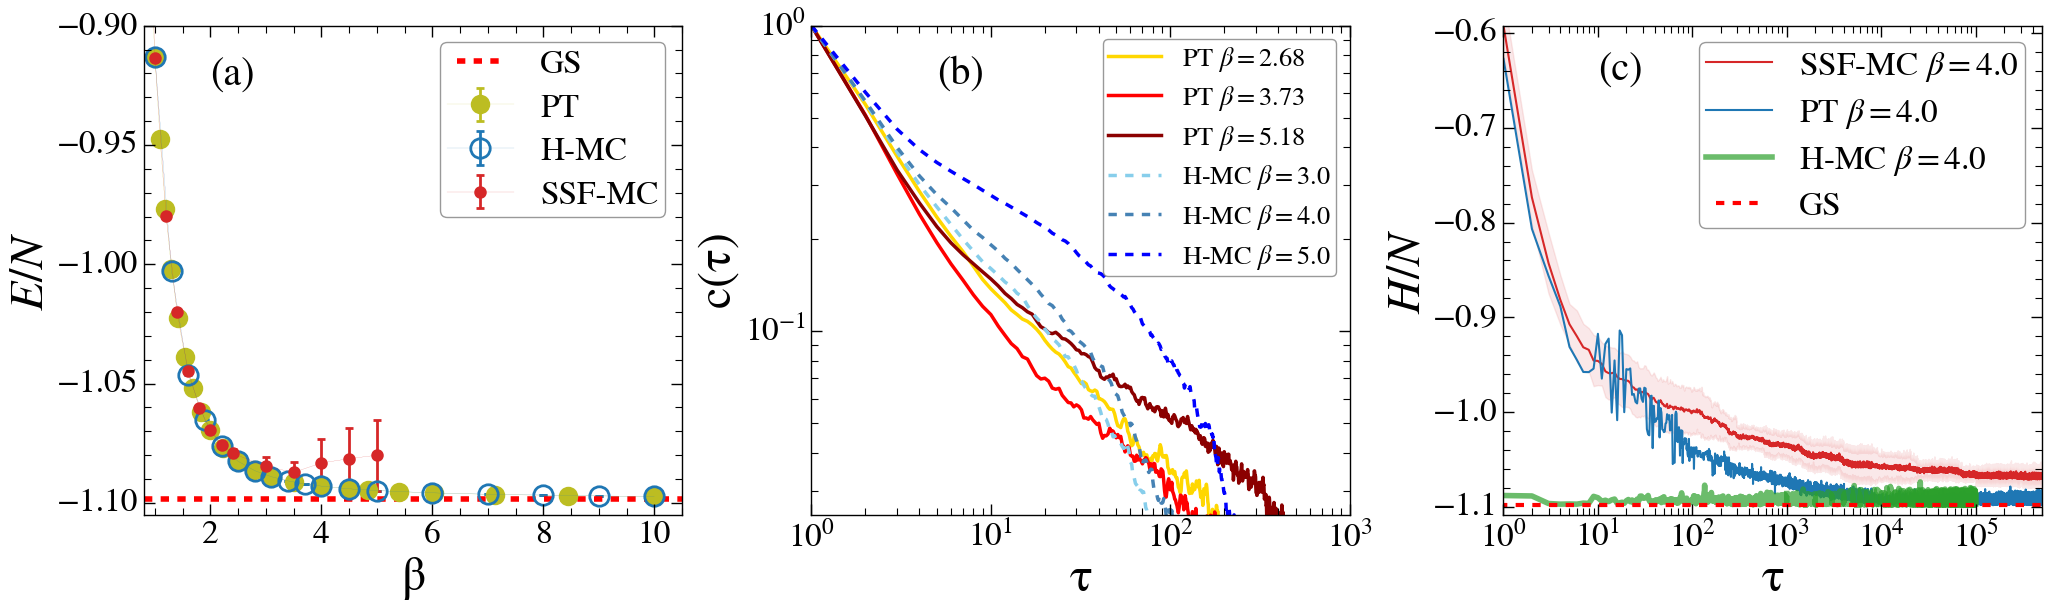

In [15]:
plt.rcParams.update({'font.size': 20})

fig, (ax5a, ax5b, ax5c)  = plt.subplots(1,3, figsize=(20.4,6), constrained_layout=True)

plt_engbeta(ax5a, data_fig5a, labels_fig5a, colors_fig5a, markers_fig5a, markersizes_fig5a, fillstyles_fig5a, 
        ground_state484_8, xlim=xlim_fig5a, ylim=ylim_fig5a, text=text_fig5a)
plt_acf(ax5b, data_fig5b, linestyle_fig5b, labels_fig5b, 
        colors_fig5b, xlim_fig5b, ylim_fig5b, text=text_fig5b)
plt_engstep(ax5c, data_fig5c, labels_fig5c, colors_fig5c, xlim_fig5c, ground_state484_8, text=text_fig5c)

#plt.savefig("fig5.pdf")


## Figure 6

Panel (a):
Histograms of $4 \times 10^5$ configuration energies per spin $H/N$, sampled by a PT simulation (blue) and by a H-MC simulation (gray with black contour) at $\beta=10$, for the $N=484\:(z=8)$ lattice.
The vertical (red) dashed line indicates the ground-state energy.
Panel (b):
Low-energy zoom on the histograms of $4 \times 10^5$ configuration energies per spin $H/N$, sampled in a H-MC simulations  at $\beta = 10$ (gray with black contour), by a D-Wave QA with annealing time $t_a = 100$\textmu s (blue), and by the trained MADE (green).


In [29]:
data_fig6a = np.loadtxt("data/data_for_fig/data_fig6a.csv", delimiter=',')
data_fig6b = np.loadtxt("data/data_for_fig/data_fig6b.csv", delimiter=',')

labels_fig6a = ["PT", "H-MC"]
colors_fig6a =["blue"]
bins_fig6a = 60
xlim_fig6a = (-1.0985, -1.0925)
ylim_fig6a = (1, 100000)
ticklables_fig6a = [-1.099, -1.098, -1.097, -1.096, -1.095, -1.094, -1.093]
text_fig6a = (-1.095, 20000, "(a)")

labels_fig6b = ["D-Wave", "MADE", "H-MC"]
colors_fig6b =["blue", "green", "whitesmoke"]
xlim_fig6b = (-1.0985, -1.095)
ylim_fig6b = (1, 20000)
bins_fig6b = 4800
ticklables_fig6b = [-1.099, -1.098, -1.097, -1.096, -1.095]
text_fig6b = (-1.0965,5000, "(b)")

/tmp/ipykernel_4223/251835495.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ticklables)


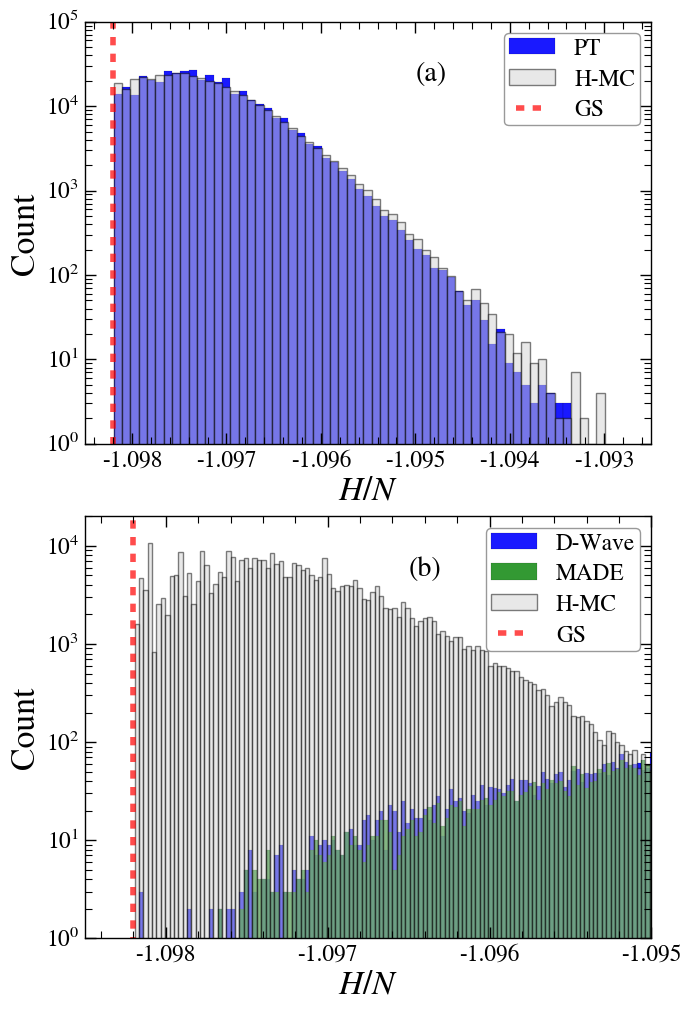

In [30]:
plt.rcParams.update({'font.size': 14})

fig, (ax6a, ax6b) = plt.subplots(2,1, figsize=(6.8,10), constrained_layout=True)

plt_hist(ax6a, data_fig6a, labels_fig6a, colors_fig6a, bins_fig6a, 
        ground_state484_8, xlim=xlim_fig6a, ylim=ylim_fig6a, ticklables=ticklables_fig6a, text=text_fig6a)
plt_hist(ax6b, data_fig6b, labels_fig6b, colors_fig6b, bins_fig6b, 
        ground_state484_8, xlim=xlim_fig6b, ylim=ylim_fig6b, ticklables=ticklables_fig6b, text=text_fig6b)

#plt.savefig("fig6.pdf")


## Figure 7

Average energy per spin $E_{\mathrm{avg}}/N$ (orange empty squares) and corresponding minimum $E_{\mathrm{min}}/N$ (blue full squares) of $10^3$  configurations sampled by a D-Wave QA, as a function of the intra-chain ferromagnetic coupling $J_c$.  The (green) empty and full rhombi correspond to the average and minimum  obtained with the default coupling of the D-Wave interface, respectively. 
Panel (a): the couplings $J_{ij}$ are sampled from $\mathrm{Unif}[-1,1]$. Panel (b): the couplings $J_{ij}=\pm 1$ are sampled from binary random distribution.

In [18]:
data_fig7 = np.loadtxt("data/data_for_fig/data_fig7.csv", delimiter=',')

# uniform-couplings properties -0.6703529724839872 +/- 0.012947966366618786 E_min/N = -0.7076580870999164
uniform_ground_state = -0.7550297905
uniform_dwave_default = [1.5828847157168355, -0.6703529724839872, 0.012947966366618786, -0.7076580870999164]
# binary-couplings properties
binary_ground_state = -1.3636342975206612
binary_dwave_default =  [2.7629798143572195, -1.1807851239669422, 0.03091436623564169, -1.2768595041322315]

strengths_fig7 = np.linspace(0.5, 4, 15)
xlim_fig7 = (0.4, 4.1)

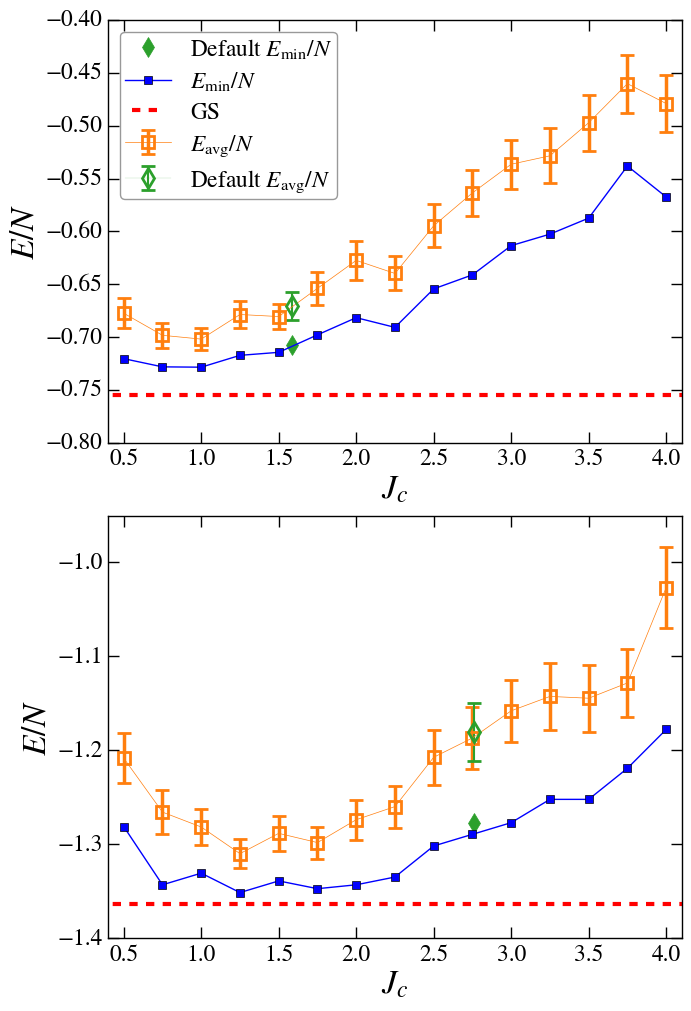

In [20]:
plt.rcParams.update({'font.size': 14})

fig, (ax7a, ax7b) = plt.subplots(2,1, figsize=(6.8,10), constrained_layout=True)
plt_chains(ax7a, data_fig7[:,:3], strengths_fig7, uniform_dwave_default, uniform_ground_state,
            xlim_fig7, legend=True)
plt_chains(ax7b, data_fig7[:,3:6], strengths_fig7, binary_dwave_default, binary_ground_state,
            xlim_fig7, legend=False)
#plt.savefig("fig7.pdf")